<div class="alert alert-info">
    <h1 align="center"></h1>
    <h1 align="center"> Expert System </h1>
    <h5 align="center">ahmed usrof </h5>
    <h5 align="center">120212439 </h5>


</div>

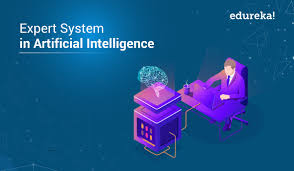

# Designing a dispute resolution mechanism in a media consultant expert system

## Suggested scenario
 - A media advisory system uses data from multiple sources to recommend news or editorial priorities, but conflicts arise when one rule considers Source X reliable based on history.

## Proposed dispute resolution mechanism
1. Methods used to resolve conflict
* Dispute resolution methods prioritize rules based on priority, importance, and specificity, and prioritize rules based on recent information over general rules.

2. Justifications for choosing the method
* The method chosen is prioritized to prioritize important rules, ensuring the system is based on the latest information, and specialization allows the system to adapt to unique situations, enhancing its effectiveness.

### Describe the methods used to resolve the conflict and Include an explanation of why your chosen method is appropriate:
#### 1. Priority

   **Priority is crucial in addressing unethical content, as it ensures immediate action       and minimizes negative impacts. For instance, content containing hate speech should       be rejected, regardless of engagement or novelty rules, to maintain ethical standards.**
   * Identifies rules or events of higher importance for faster or more important action.
   * Prioritizes most important rule based on credibility, novelty, or ethics.
   * Example: 'Content Rejection' rule prioritized over 'Interaction Review' or 'Controversial Content'.

#### 2. Recency

   **Recency is crucial as it reflects the most current information in the system, with recently updated content being the most important and should be published or addressed immediately, reflecting current events or fresh information.**

   * Resolves conflicts related to recently updated content.
   * Prioritizes most recent content in conflict.
   * Example: Content updated in last few hours.
   * Prioritizes refreshing content if other rule indicates old content.

#### 3. Privacy

   **Privacy is optimal when multiple rules are in place, with some being more specific for more accurate decisions. Prioritizing controversial or unethical content is crucial as it can lead to significant harm if not addressed promptly**

   * Identifies the most specific and complex rule for conflict resolution.
   * More specific rules yield more accurate decision-making.
   * Example: Specifying content based on national type and addressing controversial content.

**Therefore, these three methods are the most important because the system is used with software scenarios where rights and privileges are overlapped, and it is a smart way for the system to be able to create an independent application on different elements.**

# Python Code

In [ ]:
pip install experta

# ***Import libraries***

In [ ]:
from experta import *
from datetime import datetime, timedelta

# ***Define the Facts***

In [ ]:

class Credibility(Fact):
    """Represents the credibility of the source."""
    pass

class Content(Fact):
    """Represents the type and category of content."""
    pass

class Interaction(Fact):
    """Represents the interaction level with the content."""
    pass

class Medium(Fact):
    """Represents the selected medium based on rules."""
    pass


# ***Define the Knowledge Engine***

In [ ]:

class MediaAdvisor(KnowledgeEngine):
    def __init__(self):
        super().__init__()
        print("Initializing the Media Advisor Expert System...\n")


    @Rule(Credibility(credibility='Old person') |
          Credibility(credibility='Ancient history') |
          Credibility(credibility='Credibility'))
    def credibility_displays(self):
        print("Rule triggered: Credibility is 'Displays'.")
        self.declare(Fact(stimulus_situation='Displays'))


    @Rule(Credibility(credibility=MATCH.credibility),
          TEST(lambda credibility: credibility.isdigit() and int(credibility) >= 80))
    def high_credibility(self):
        print("Rule triggered: High credibility detected.")
        self.declare(Fact(stimulus_situation='Depends'))

    @Rule(Credibility(credibility='Underexcited'))
    def low_credibility(self):
        print("Rule triggered: Credibility is 'Away'.")
        self.declare(Fact(stimulus_situation='Away'))


    @Rule(Content(content='National') |
          Content(content='Security'))
    def content_check(self):
        print("Rule triggered: Content requires 'Check'.")
        self.declare(Fact(stimulus_response='Check'))

    @Rule(Content(content='controversial') |
          Content(content='sensitive') |
          Content(content='violent'))
    def alert_admin(self):
        print("Rule triggered: Content is 'Controversial'. Notifying the admin.")
        self.declare(Fact(stimulus_response='Alert'))

    @Rule(Content(content=MATCH.content, updated_at=MATCH.updated_at),
          TEST(lambda updated_at: (datetime.now() - updated_at).total_seconds() <= 3600))
    def recent_content(self, content, updated_at):
        print(f"Rule triggered: Recent content '{content}' detected. Prioritizing.")
        self.declare(Fact(priority='High'))

    @Rule(Content(content=MATCH.content, category='Unethical'))
    def reject_unethical(self, content):
        print(f"Rule triggered: Unethical content '{content}'. Rejecting.")
        self.declare(Fact(stimulus_response='Reject'))


    @Rule(Content(content=MATCH.content, interaction=MATCH.interaction, avg_interaction=MATCH.avg_interaction),
          TEST(lambda interaction, avg_interaction: interaction >= 5 * avg_interaction))
    def high_interaction(self, content, interaction, avg_interaction):
        print(f"Rule triggered: Content '{content}' has high interaction ({interaction} vs avg {avg_interaction}). Reviewing.")
        self.declare(Fact(stimulus_response='Review'))


    @Rule(Fact(stimulus_situation='Away'), Fact(stimulus_response='Check'))
    def non_publication(self):
        print("Final Rule triggered: Medium is 'Non-publication'.")
        self.declare(Medium(medium='Non-publication'))

    @Rule(Fact(priority='High'))
    def immediate_publication(self):
        print("Final Rule triggered: Medium is 'Immediate Publication'.")
        self.declare(Medium(medium='Immediate Publication'))

    @Rule(Fact(stimulus_response='Reject'))
    def reject_content(self):
        print("Final Rule triggered: Content is 'Rejected'.")
        self.declare(Medium(medium='Rejection'))

    @Rule(Fact(stimulus_response='Review'))
    def detailed_review(self):
        print("Final Rule triggered: Medium is 'Detailed Review'.")
        self.declare(Medium(medium='Detailed Review'))


x = MediaAdvisor()

Initializing the Media Advisor Expert System...



# ***Example test cases***

In [ ]:
print("\nTest Case 1: Credible Source + National Content + Normal Interaction")
x.reset()
x.declare(Credibility(credibility='Old person'))
x.declare(Content(content='National'))
x.declare(Interaction(interaction=50, avg_interaction=40))
x.run()


Test Case 1: Credible Source + National Content + Normal Interaction
Rule triggered: Content requires 'Check'.
Rule triggered: Credibility is 'Displays'.


In [ ]:
print("\nTest Case 2: High Credibility + Controversial Content + High Interaction")
x.reset()
x.declare(Credibility(credibility='85'))
x.declare(Content(content='controversial'))
x.declare(Interaction(interaction=1000, avg_interaction=150))
x.run()


Test Case 2: High Credibility + Controversial Content + High Interaction
Rule triggered: Content is 'Controversial'. Notifying the admin.
Rule triggered: High credibility detected.


In [ ]:
print("\nTest Case 3: Low Credibility + Unethical Content + Low Interaction")
x.reset()
x.declare(Credibility(credibility='Underexcited'))
x.declare(Content(content='Hate Speech', category='Unethical'))
x.declare(Interaction(interaction=5, avg_interaction=10))
x.run()


Test Case 3: Low Credibility + Unethical Content + Low Interaction
Rule triggered: Unethical content 'Hate Speech'. Rejecting.
Final Rule triggered: Content is 'Rejected'.
Rule triggered: Credibility is 'Away'.


In [ ]:

print("\nTest Case 4: Recent Content + High Interaction + Credible Source")
x.reset()
recent_time = datetime.now() - timedelta(minutes=30)
x.declare(Credibility(credibility='85'))
x.declare(Content(content='Breaking News', updated_at= recent_time))
x.declare(Interaction(interaction=1000, avg_interaction=150))
x.run()


Test Case 4: Recent Content + High Interaction + Credible Source
Rule triggered: Recent content 'Breaking News' detected. Prioritizing.
Final Rule triggered: Medium is 'Immediate Publication'.
Rule triggered: High credibility detected.


In [ ]:
print("\nTest Case 5: National Content + Controversial Content + Low Interaction")
x.reset()
x.declare(Content(content='National'))
x.declare(Content(content='controversial'))
x.declare(Interaction(interaction=5, avg_interaction=10))
x.run()


Test Case 5: National Content + Controversial Content + Low Interaction
Rule triggered: Content is 'Controversial'. Notifying the admin.
Rule triggered: Content requires 'Check'.


In [ ]:
print("\nTest Case 6: Low Credibility Source + Unethical Content + High Interaction")
x.reset()
x.declare(Credibility(credibility='Underexcited'))
x.declare(Content(content='Hate Speech', category='Unethical'))
x.declare(Interaction(interaction=1000, avg_interaction=200))
x.run()


Test Case 6: Low Credibility Source + Unethical Content + High Interaction
Rule triggered: Unethical content 'Hate Speech'. Rejecting.
Final Rule triggered: Content is 'Rejected'.
Rule triggered: Credibility is 'Away'.


In [ ]:
print("\nTest Case 7: Recent Content + Controversial Content + Normal Interaction")
x.reset()
recent_time = datetime.now() - timedelta(minutes=15)
x.declare(Content(content='Breaking News', updated_at=recent_time))
x.declare(Content(content='controversial'))
x.declare(Interaction(interaction=50, avg_interaction=40))
x.run()



Test Case 7: Recent Content + Controversial Content + Normal Interaction
Rule triggered: Content is 'Controversial'. Notifying the admin.
Rule triggered: Recent content 'Breaking News' detected. Prioritizing.
Final Rule triggered: Medium is 'Immediate Publication'.
